In [3]:
import random
import math
import statistics
import matplotlib.pyplot as plt


In [4]:
%matplotlib inline

In [11]:
import random

class Dice:

    def roll(self):
        return random.randint(1,6)

class Player_base:
    
    def __init__(self, rounds=7):
        self.dice = Dice()
        self.rounds = rounds
        self.score_total = 0

    def player_turn(self):
        round_count = 0
        counter = 0
        self.roll_number = 0
        self.game_score = 0
        self.round_score = 0
        list_scores = []
        while round_count < self.rounds:
            round_count += 1
            counter = 0
            while counter < 1:
                roll = self.dice.roll()
                if roll == 1:
                    self.round_score = 0
                    list_scores.append(self.round_score)
                    counter = 1 
                else:
                    self.round_score += roll
                    self.game_score += self.round_score
                    list_scores.append(self.round_score)
                    self.round_score = 0
                    counter = 1
        
        print("Player scored {} points in {} rounds.".format(self.game_score, self.rounds))

player = Player_base()
player.player_turn()


Player scored 26 points in 7 rounds.


In [15]:
class Player_Score_20:
    
    def __init__(self, rounds=7):
        self.dice = Dice()
        self.rounds = rounds
        self.score_total = 0

    def player_turn(self):
        round_count = 0
        counter = 0
        self.roll_number = 0
        self.game_score = 0
        self.round_score = 0
        list_scores = []
        while round_count < self.rounds:
            round_count += 1
            #print("Round #{}. Game total: {}.".format(round_count, self.game_score))
            counter = 0
            while counter < 1:
                roll = self.dice.roll()
                #print("Computer rolls a {}".format(roll))
                if roll == 1:
                    self.round_score = 0
                    list_scores.append(self.round_score)
                    #print("End of Round #{}. Round Score: {}. Total Score: {}.".format(round_count, self.round_score, self.game_score))
                    #print("------------------------")
                    counter = 1 
                else:
                    self.round_score += roll
                    if self.round_score < 20:
                        #print("Computer chooses to roll again.")
                        #print("------------------------")
                        continue
                    else:
                        self.game_score += self.round_score
                        list_scores.append(self.round_score)
                        #print("Computer ends turn. Round Score: {}.".format(self.round_score))
                        #print("------------------------")
                        self.round_score = 0
                        counter = 1
        
        print("End of Game. Player scored {} points in {} rounds.".format(self.game_score, self.rounds))

player = Player_Score_20()
player.player_turn()


End of Game. Player scored 45 points in 7 rounds.


In [196]:
class Player_base:
    
    def __init__(self, samples=1000, rounds=7):
        self.samples = samples
        self.dice = Dice()
        self.rounds = rounds
        self.score_total = 0

    def player_turn(self):
        list_round_scores = []
        self.list_samples = []
        self.sample = 0
        for x in range(self.samples):
            round_count = 0
            self.game_score = 0
            self.round_score = 0
            counter = 0
            self.roll_number = 0
            while round_count < self.rounds:
                round_count += 1
                counter = 0
                while counter < 1:
                    roll = self.dice.roll()
                    if roll == 1:
                        self.round_score = 0
                        list_round_scores.append(self.round_score)
                        counter = 1 
                    else:
                        self.round_score += roll
                        self.game_score += self.round_score
                        list_round_scores.append(self.round_score)
                        self.round_score = 0
                        counter = 1
            self.list_samples.append(self.game_score)
            self.average = sum(self.list_samples) / len(self.list_samples)
        return self.list_samples

player = Player_base()
base_results = player.player_turn()
player.average

23.445

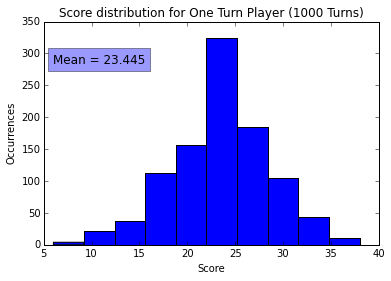

In [226]:
plt.hist(base_results, bins=10)
plt.title("Score distribution for One Turn Player (1000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(6, 300, "Mean = {}".format(player.average), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

This shows the score distribution over a seven round game for an AI who only takes one roll per turn.

In [265]:
class Player_Score_20:
    
    def __init__(self, samples=10000, rounds=7):
        self.samples = samples
        self.dice = Dice()
        self.rounds = rounds
        self.score_total = 0

    def player_turn(self):
        list_round_scores = []
        self.list_samples = []
        self.sample = 0
        for x in range(self.samples):
            round_count = 0
            self.game_score = 0
            self.round_score = 0
            counter = 0
            self.roll_number = 0
            while round_count < self.rounds:
                round_count += 1
                counter = 0
                while counter < 1:
                    roll = self.dice.roll()
                    if roll == 1:
                        self.round_score = 0
                        list_round_scores.append(self.round_score)
                        counter = 1 
                    else:
                        self.round_score += roll
                        if self.round_score < 20:
                            continue
                        else:
                            self.game_score += self.round_score
                            list_round_scores.append(self.round_score)
                            self.round_score = 0
                            counter = 1
            self.list_samples.append(self.game_score)
            self.average = sum(self.list_samples) / len(self.list_samples)
        return self.list_samples

player = Player_Score_20()
Score_20_results = player.player_turn()
player.average

56.7561

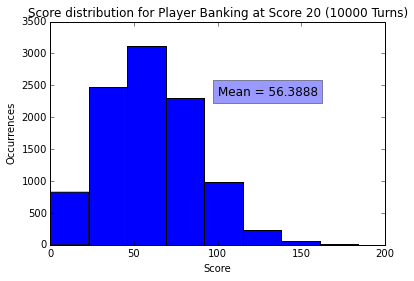

In [347]:
plt.hist(Score_20_results, bins=8)
plt.title("Score distribution for Player Banking at Score 20 (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(100, 2500, "Mean = {}".format(player.average), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

In [276]:
class Player_Score_25:
    
    def __init__(self, samples=10000, rounds=7):
        self.samples = samples
        self.dice = Dice()
        self.rounds = rounds
        self.score_total = 0

    def player_turn(self):
        list_round_scores = []
        self.list_samples = []
        self.sample = 0
        for x in range(self.samples):
            round_count = 0
            self.game_score = 0
            self.round_score = 0
            counter = 0
            self.roll_number = 0
            while round_count < self.rounds:
                round_count += 1
                counter = 0
                while counter < 1:
                    roll = self.dice.roll()
                    if roll == 1:
                        self.round_score = 0
                        list_round_scores.append(self.round_score)
                        counter = 1 
                    else:
                        self.round_score += roll
                        if self.round_score < 25:
                            continue
                        else:
                            self.game_score += self.round_score
                            list_round_scores.append(self.round_score)
                            self.round_score = 0
                            counter = 1
            self.list_samples.append(self.game_score)
            self.average = sum(self.list_samples) / len(self.list_samples)
        return self.list_samples

player = Player_Score_25()
Player_Score_25_results = player.player_turn()
player.average

56.3802

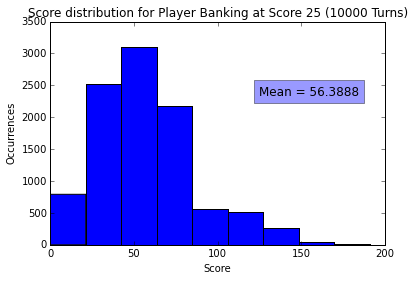

In [346]:
plt.hist(Player_Score_25_results, bins=9)
plt.title("Score distribution for Player Banking at Score 25 (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(125, 2500, "Mean = {}".format(player.average), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

When having the AI end their turn after scoring 25, rather than 20, we see the score distribution shift as higher scores are possible and have a greater possibility of occuring. However, the overall 7 round average goes down slightly. 

In [288]:
class Player_Score_30:
    
    def __init__(self, samples=10000, rounds=7):
        self.samples = samples
        self.dice = Dice()
        self.rounds = rounds
        self.score_total = 0

    def player_turn(self):
        list_round_scores = []
        self.list_samples = []
        self.sample = 0
        for x in range(self.samples):
            round_count = 0
            self.game_score = 0
            self.round_score = 0
            counter = 0
            self.roll_number = 0
            while round_count < self.rounds:
                round_count += 1
                counter = 0
                while counter < 1:
                    roll = self.dice.roll()
                    if roll == 1:
                        self.round_score = 0
                        list_round_scores.append(self.round_score)
                        counter = 1 
                    else:
                        self.round_score += roll
                        if self.round_score < 30:
                            continue
                        else:
                            self.game_score += self.round_score
                            list_round_scores.append(self.round_score)
                            self.round_score = 0
                            counter = 1
            self.list_samples.append(self.game_score)
            self.average = sum(self.list_samples) / len(self.list_samples)
        return self.list_samples

player = Player_Score_30()
Player_Score_30_results = player.player_turn()
player.average

52.8344

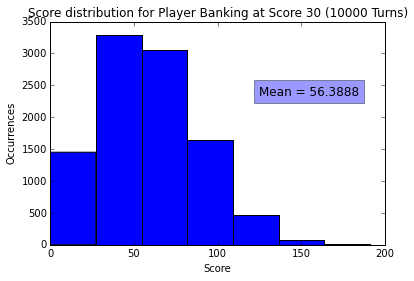

In [345]:
plt.hist(Player_Score_30_results, bins=7)
plt.title("Score distribution for Player Banking at Score 30 (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(125, 2500, "Mean = {}".format(player.average), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

We see the average 7 round score continue to go down if we only allow the AI to pass their turn after scoring 30 in a round. Distribution seems relatively the same as the 25 point limit.

In [290]:
class Player_Score_15:
    
    def __init__(self, samples=10000, rounds=7):
        self.samples = samples
        self.dice = Dice()
        self.rounds = rounds
        self.score_total = 0

    def player_turn(self):
        list_round_scores = []
        self.list_samples = []
        self.sample = 0
        for x in range(self.samples):
            round_count = 0
            self.game_score = 0
            self.round_score = 0
            counter = 0
            self.roll_number = 0
            while round_count < self.rounds:
                round_count += 1
                counter = 0
                while counter < 1:
                    roll = self.dice.roll()
                    if roll == 1:
                        self.round_score = 0
                        list_round_scores.append(self.round_score)
                        counter = 1 
                    else:
                        self.round_score += roll
                        if self.round_score < 15:
                            continue
                        else:
                            self.game_score += self.round_score
                            list_round_scores.append(self.round_score)
                            self.round_score = 0
                            counter = 1
            self.list_samples.append(self.game_score)
            self.average = sum(self.list_samples) / len(self.list_samples)
        return self.list_samples

player = Player_Score_15()
Player_Score_15_results = player.player_turn()
player.average

54.8002

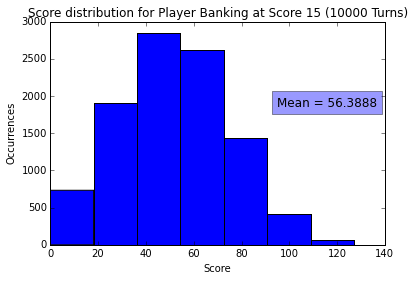

In [344]:
plt.hist(Player_Score_15_results, bins=7)
plt.title("Score distribution for Player Banking at Score 15 (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(95, 2000, "Mean = {}".format(player.average), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

The average is not as high as the round limit of 20 - which seems to be optimal. The potential for high scores is also worse.

In [317]:
class Player_Rolls_5:
    
    def __init__(self, samples=10000, rounds=7):
        self.samples = samples
        self.dice = Dice()
        self.rounds = rounds
        self.score_total = 0

    def player_turn(self):
        list_round_scores = []
        self.list_samples = []
        self.sample = 0
        for x in range(self.samples):
            round_count = 0
            self.game_score = 0
            self.round_score = 0
            counter = 0
            while round_count < self.rounds:
                round_count += 1
                counter = 0
                self.roll_count = 0
                while counter < 1:
                    roll = self.dice.roll()
                    self.roll_count += 1
                    if roll == 1:
                        self.round_score = 0
                        list_round_scores.append(self.round_score)
                        counter = 1 
                    else:
                        self.round_score += roll
                        if self.roll_count < 5:
                            continue
                        else:
                            self.game_score += self.round_score
                            list_round_scores.append(self.round_score)
                            self.round_score = 0
                            counter = 1
            self.list_samples.append(self.game_score)
            self.average = sum(self.list_samples) / len(self.list_samples)
        return self.list_samples

player = Player_Rolls_5()
Player_Rolls_5_results = player.player_turn()
player.average

55.9112

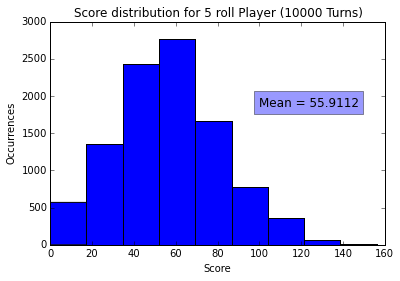

In [320]:
plt.hist(Player_Rolls_5_results, bins=9)
plt.title("Score distribution for 5 roll Player (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(100, 2000, "Mean = {}".format(player.average), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

Now, we've completely shifted strategy and have placed a round limit on the number of rolls the AI can take. In this run, the AI has to pass after a max of five rolls, which we see results in a very strong average off 56. with a normal distribution.

In [326]:
class Player_Rolls_8:
    
    def __init__(self, samples=10000, rounds=7):
        self.samples = samples
        self.dice = Dice()
        self.rounds = rounds
        self.score_total = 0

    def player_turn(self):
        list_round_scores = []
        self.list_samples = []
        self.sample = 0
        for x in range(self.samples):
            round_count = 0
            self.game_score = 0
            self.round_score = 0
            counter = 0
            while round_count < self.rounds:
                round_count += 1
                counter = 0
                self.roll_count = 0
                while counter < 1:
                    roll = self.dice.roll()
                    self.roll_count += 1
                    if roll == 1:
                        self.round_score = 0
                        list_round_scores.append(self.round_score)
                        counter = 1 
                    else:
                        self.round_score += roll
                        if self.roll_count < 8:
                            continue
                        else:
                            self.game_score += self.round_score
                            list_round_scores.append(self.round_score)
                            self.round_score = 0
                            counter = 1
            self.list_samples.append(self.game_score)
            self.average = sum(self.list_samples) / len(self.list_samples)
        return self.list_samples

player = Player_Rolls_8()
Player_Rolls_8_results = player.player_turn()
player.average

52.3901

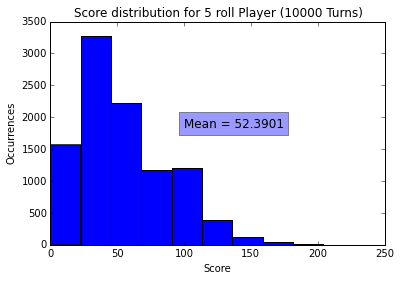

In [327]:
plt.hist(Player_Rolls_8_results, bins=9)
plt.title("Score distribution for 5 roll Player (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(100, 2000, "Mean = {}".format(player.average), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

Interestingly, increasing this limit to 8 rolls decreases the computer's score pretty significantly. Likely, the computer is trying to stretch it's luck too thin by never banking until after roll 8. The chance of rolling a 1 within these turns is too high. However, if you are going for a max score this looks like the way to go, as there was a score in the 200 range

In [328]:
class Player_Rolls_12:
    
    def __init__(self, samples=10000, rounds=7):
        self.samples = samples
        self.dice = Dice()
        self.rounds = rounds
        self.score_total = 0

    def player_turn(self):
        list_round_scores = []
        self.list_samples = []
        self.sample = 0
        for x in range(self.samples):
            round_count = 0
            self.game_score = 0
            self.round_score = 0
            counter = 0
            while round_count < self.rounds:
                round_count += 1
                counter = 0
                self.roll_count = 0
                while counter < 1:
                    roll = self.dice.roll()
                    self.roll_count += 1
                    if roll == 1:
                        self.round_score = 0
                        list_round_scores.append(self.round_score)
                        counter = 1 
                    else:
                        self.round_score += roll
                        if self.roll_count < 12:
                            continue
                        else:
                            self.game_score += self.round_score
                            list_round_scores.append(self.round_score)
                            self.round_score = 0
                            counter = 1
            self.list_samples.append(self.game_score)
            self.average = sum(self.list_samples) / len(self.list_samples)
        return self.list_samples

player = Player_Rolls_12()
Player_Rolls_12_results = player.player_turn()
player.average

37.6263

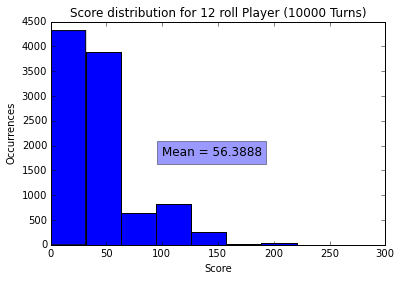

In [343]:
plt.hist(Player_Rolls_12_results, bins=8)
plt.title("Score distribution for 12 roll Player (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(100, 2000, "Mean = {}".format(player.average), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

Very showing when having the computer hold until 12 rounds.

In [337]:
class Player_Rolls_6:
    
    def __init__(self, samples=10000, rounds=7):
        self.samples = samples
        self.dice = Dice()
        self.rounds = rounds
        self.score_total = 0

    def player_turn(self):
        list_round_scores = []
        self.list_samples = []
        self.sample = 0
        for x in range(self.samples):
            round_count = 0
            self.game_score = 0
            self.round_score = 0
            counter = 0
            while round_count < self.rounds:
                round_count += 1
                counter = 0
                self.roll_count = 0
                while counter < 1:
                    roll = self.dice.roll()
                    self.roll_count += 1
                    if roll == 1:
                        self.round_score = 0
                        list_round_scores.append(self.round_score)
                        counter = 1 
                    else:
                        self.round_score += roll
                        if self.roll_count < 6:
                            continue
                        else:
                            self.game_score += self.round_score
                            list_round_scores.append(self.round_score)
                            self.round_score = 0
                            counter = 1
            self.list_samples.append(self.game_score)
            self.average = sum(self.list_samples) / len(self.list_samples)
        return self.list_samples

player = Player_Rolls_6()
Player_Rolls_6_results = player.player_turn()
player.average

56.3888

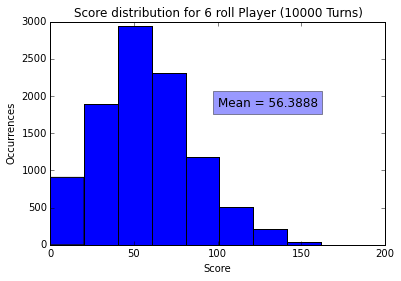

In [341]:
plt.hist(Player_Rolls_6_results, bins=9)
plt.title("Score distribution for 6 roll Player (10000 Turns)")
plt.xlabel("Score")
plt.ylabel("Occurrences")
plt.text(100, 2000, "Mean = {}".format(player.average), fontsize=12,
        verticalalignment='top',bbox={'facecolor':'blue', 'alpha':0.4, 'pad':10})

plt.show()

Final conclusions - the best bot playing pig solitaire would pass after five or six turns, or if going by score, bank after 25 in a round. The highest average 7 round score we were able to tally was 56.34 by a player banking after 6 turns. 